In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

# Naive bayes classifier
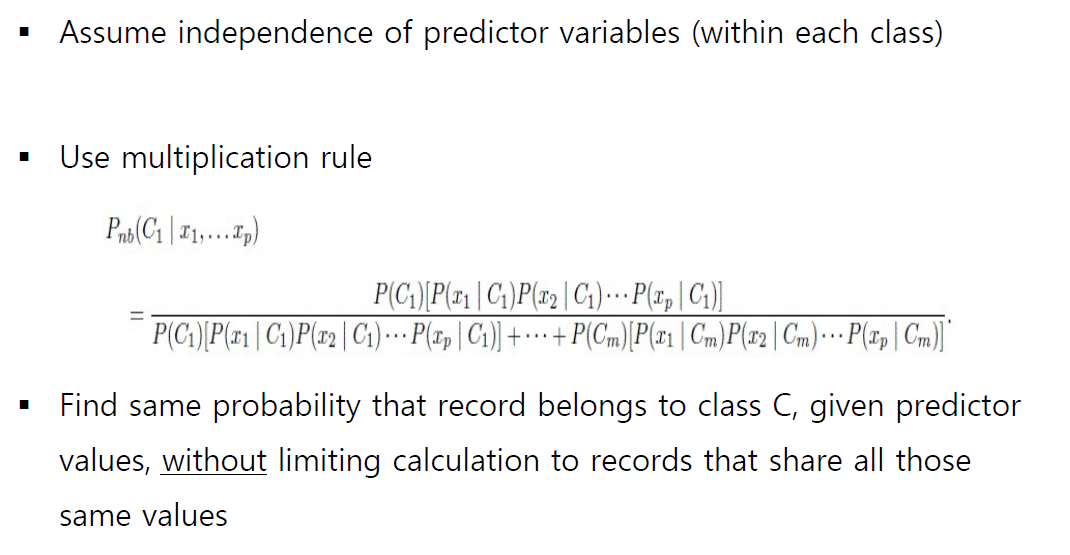

##### 특징
- 적용이 쉽고, 큰 데이터 셋에도 적용 가능
- continuous data, discrete data에 모두 사용이 가능
- classification 문제에만 사용
- 모든 변수가 모두 독립이라는 엄격한 가정을 하는 것에 비하여 성능이 좋음

## Data
- predictors: 'DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER'
- target: 'Flight Status' (비행기 지연 예측)
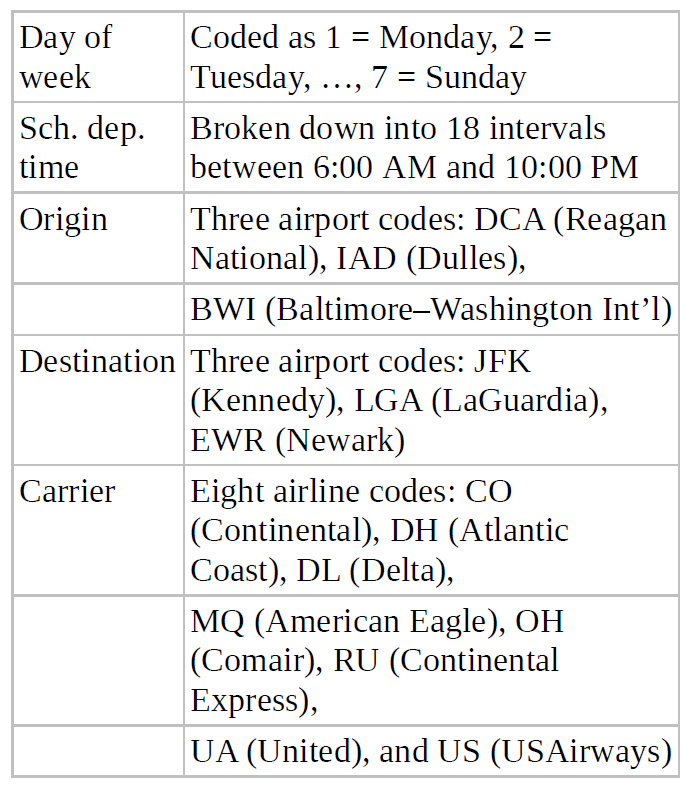

In [2]:
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
target = ['Flight Status']

##### Data import

In [3]:
delays_df = pd.read_csv('./data/FlightDelays.csv')[predictors+target]
print(delays_df.shape)
delays_df.head()

(2201, 6)


,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER,Flight Status
0,4,1455,BWI,JFK,OH,ontime
1,4,1640,DCA,JFK,DH,ontime
2,4,1245,IAD,LGA,DH,ontime
3,4,1715,IAD,LGA,DH,ontime
4,4,1039,IAD,LGA,DH,ontime


##### column들의 datatype을 확인하시오.

In [4]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 6 columns):
DAY_WEEK         2201 non-null int64
CRS_DEP_TIME     2201 non-null int64
ORIGIN           2201 non-null object
DEST             2201 non-null object
CARRIER          2201 non-null object
Flight Status    2201 non-null object
dtypes: int64(2), object(4)
memory usage: 103.3+ KB


##### 데이터를 간단하게 파악해보시오.

In [5]:
delays_df.DAY_WEEK.value_counts()

5    391
4    372
3    320
1    308
2    307
7    253
6    250
Name: DAY_WEEK, dtype: int64

In [6]:
print(delays_df.CRS_DEP_TIME.min())
print(delays_df.CRS_DEP_TIME.max())

600
2130


In [7]:
for col in ["ORIGIN", "DEST", "CARRIER"]:
    print(delays_df[col].value_counts())
    print("")

DCA    1370
IAD     686
BWI     145
Name: ORIGIN, dtype: int64

LGA    1150
EWR     665
JFK     386
Name: DEST, dtype: int64

DH    551
RU    408
US    404
DL    388
MQ    295
CO     94
UA     31
OH     30
Name: CARRIER, dtype: int64



## Preprocessing
- DAY_WEEK의 data type은 int로 1~7의 숫자로 구성되어 있지만 각 숫자는 요일을 의미하는 것으로 category형 변수로 변형하여 사용
- CRS_DEP_TIME은 시간분 형태로 (e.g. 1455는 오후 2시 55분 의미) 시간대 정보를 담고 있는 cateogry형 변수로 변형하여 사용

##### DAY_WEEK의 타입을 category형으로 바꾸시오. (astype 활용)

In [8]:
print("이전 type: ", delays_df.DAY_WEEK.dtype)
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')
print("이후 type: ", delays_df.DAY_WEEK.dtype)

이전 type:  int64
이후 type:  category


##### Q4) CRS_DEP_TIME을 시간대 정보로 변형하고, 타입을 category형으로 바꾸시오.

In [9]:
delays_df.CRS_DEP_TIME = [np.floor(t / 100) for t in delays_df.CRS_DEP_TIME] ### Write code: 시간분 -> 시간으로 변형
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category') ### Write code: category형으로 변환
print(delays_df.CRS_DEP_TIME.dtype)
print('')
print(delays_df.CRS_DEP_TIME.value_counts().sort_index())

category

6.0     126
7.0     135
8.0     162
9.0     108
10.0    100
11.0     68
12.0    142
13.0    157
14.0    236
15.0    154
16.0    178
17.0    241
18.0     85
19.0    119
20.0     53
21.0    137
Name: CRS_DEP_TIME, dtype: int64


In [10]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 6 columns):
DAY_WEEK         2201 non-null category
CRS_DEP_TIME     2201 non-null category
ORIGIN           2201 non-null object
DEST             2201 non-null object
CARRIER          2201 non-null object
Flight Status    2201 non-null object
dtypes: category(2), object(4)
memory usage: 74.3+ KB


object형 변수는 pd.get_dummies 할 때 알아서 category처럼 인식되서 one-hot encoding의 대상이 되지만, int형 변수는 pd.get_dummies 할 때 one-hot encoding의 대상이 되지 않기 때문에 DAY_WEEK, CRS_DEP_TIME에 대해서만 category 변수로 변형해주는 작업을 거친 것

##### 모든 predictor 변수들을 one-hot encoding 하여 X에 저장하시오.

In [11]:
X = pd.get_dummies(delays_df[predictors])
X.head()

,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,CRS_DEP_TIME_6.0,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,...,DEST_JFK,DEST_LGA,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


#####  target 변수를 y에 저장하시오.

In [12]:
y = delays_df["Flight Status"]
y.head()

0    ontime
1    ontime
2    ontime
3    ontime
4    ontime
Name: Flight Status, dtype: object

##### train : valid = 6 : 4로 나누시오.

In [13]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

평소랑 다르게 노말라이즈 안해줫음 체크

## Learn naive bayes classifier

##### import sklearn naive_bayes module
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

다양한 naive bayes module이 있음에 대해 링크 들어가서 대충 알려주고 넘어가기
- multinomial은 NLP에 많이 쓴다고 함

Naive Bayes classifier is a general term which refers to conditional independence of each of the features in the model, while Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.

Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing). 하나도 안나온 클래스? 값이 잇으면 확률이 0이 곱해지는 문제를 해결하기 위한 스무딩

In [14]:
from sklearn.naive_bayes import MultinomialNB

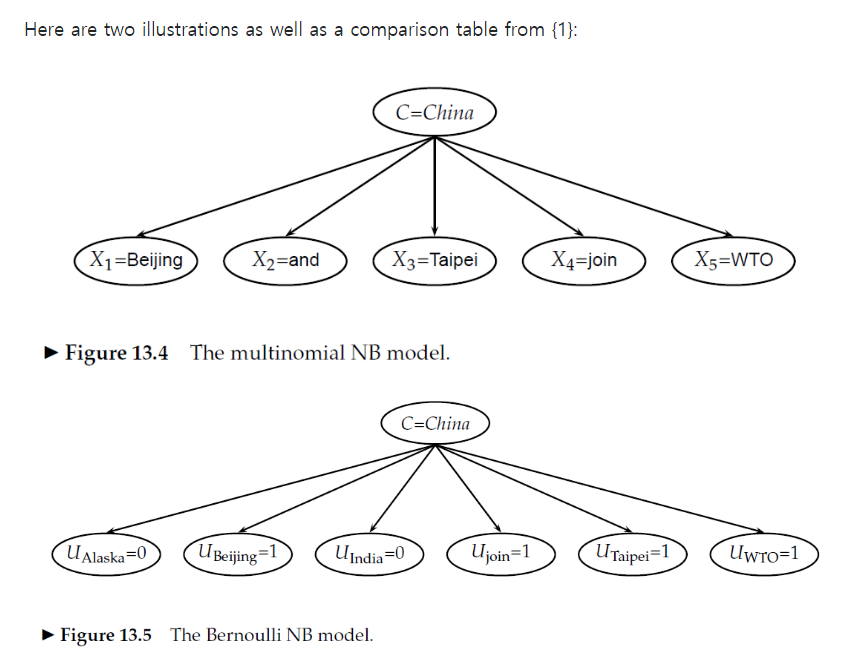

##### naive bayes 모델을 학습하시오. (fit 메소드 활용)

In [15]:
nb = MultinomialNB()
nb.fit(train_X, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### 학습한 모델을 이용하여 train_X의 target 값을 예측하는 방법을 탐색해보시오. (predict 메소드 활용)

In [16]:
nb.predict(train_X)

array(['ontime', 'ontime', 'ontime', ..., 'ontime', 'ontime', 'ontime'],
      dtype='<U7')

##### 학습한 모델이 각 class로 예측한 확률을 출력해보시오. (predict_proba 메소드 활용)

In [17]:
nb.predict_proba(train_X)

array([[0.45145253, 0.54854747],
       [0.03104915, 0.96895085],
       [0.01845605, 0.98154395],
       ...,
       [0.06076148, 0.93923852],
       [0.45338566, 0.54661434],
       [0.37326051, 0.62673949]])

아마 target value 사전순으로 0번째, 1번째가 정해지는 듯

## Performance 평가
학습한 모델을 confusion matrix, accuracy score, auc를 활용하여 train set, valid set에 대해 평가해보시오.

##### import modules

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

##### train set에 대해 performance를 평가해보시오.

In [19]:
# 정답 데이터 구성
train_y.value_counts()

ontime     1059
delayed     261
Name: Flight Status, dtype: int64

In [20]:
# confusion matrix
confusion_matrix(train_y, nb.predict(train_X), labels=["delayed", "ontime"])

array([[  50,  211],
       [  49, 1010]], dtype=int64)

In [21]:
# accuracy
accuracy_score(train_y, nb.predict(train_X))

0.803030303030303

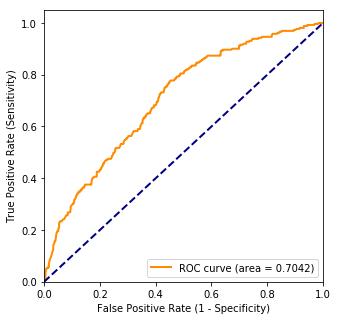

In [22]:
# roc curve, auc
fpr, tpr, threshold = roc_curve(train_y, nb.predict_proba(train_X)[:, 0], pos_label="delayed")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

##### valid set에 대해 performance를 평가해보시오.

In [23]:
# 정답 데이터 구성
valid_y.value_counts()

ontime     714
delayed    167
Name: Flight Status, dtype: int64

In [24]:
# confusion matrix
confusion_matrix(valid_y, nb.predict(valid_X), labels=["delayed", "ontime"])

array([[ 24, 143],
       [ 39, 675]], dtype=int64)

In [25]:
# accuracy
accuracy_score(valid_y, nb.predict(valid_X))

0.793416572077185

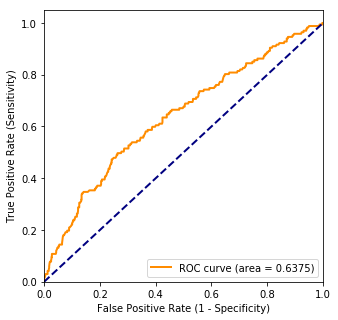

In [26]:
# roc curve, auc
fpr, tpr, threshold = roc_curve(valid_y, nb.predict_proba(valid_X)[:, 0], pos_label="delayed")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

##### 조건부 확률 계산 확인

In [27]:
delays_df.head()

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER,Flight Status
0,4,14.0,BWI,JFK,OH,ontime
1,4,16.0,DCA,JFK,DH,ontime
2,4,12.0,IAD,LGA,DH,ontime
3,4,17.0,IAD,LGA,DH,ontime
4,4,10.0,IAD,LGA,DH,ontime


In [28]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(delays_df, test_size=0.4, random_state=1)

In [29]:
train_df['Flight Status'].value_counts() / len(train_df)

ontime     0.802273
delayed    0.197727
Name: Flight Status, dtype: float64

In [30]:
df = train_df[["Flight Status", "DAY_WEEK"]]
freqTable = df.pivot_table(index='Flight Status', columns="DAY_WEEK", aggfunc=len)
propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
propTable

DAY_WEEK,1,2,3,4,5,6,7
Flight Status,,,,,,,
delayed,0.191571,0.149425,0.114943,0.126437,0.187739,0.068966,0.160920
ontime,0.124646,0.141643,0.144476,0.179415,0.169027,0.135977,0.104816


In [31]:
table_dict = dict()
table_dict["DAY_WEEK"] = propTable

In [32]:
table_dict = dict()
for predictor in predictors:
    # construct the frequency table
    df = train_df[['Flight Status', predictor]]
    freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    table_dict[predictor] = propTable

In [33]:
new = {"CARRIER": "DL", "DAY_WEEK": 7, "CRS_DEP_TIME": 10, "DEST": "LGA", "ORIGIN": "DCA"}

# P(delayed | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
idx = "delayed"
P_hat_delayed = 1
for k in new.keys():
    P_hat_delayed *= table_dict[k].loc[idx, new[k]]
P_hat_delayed *= len(train_df[train_df['Flight Status']==idx])/len(train_df)

# P(ontime | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
idx = "ontime"
P_hat_ontime = 1
for k in new.keys():
    P_hat_ontime *= table_dict[k].loc[idx, new[k]]
P_hat_ontime *= len(train_df[train_df['Flight Status']==idx])/len(train_df)

print('P_hat_delayed ~ ', P_hat_delayed)
print('P_hat_ontime ~ ', P_hat_ontime)

print('P(delayed|...) = ', P_hat_delayed / (P_hat_delayed + P_hat_ontime))
print('P(ontime|...) = ', P_hat_ontime / (P_hat_delayed + P_hat_ontime))

P_hat_delayed ~  2.0515160500936783e-05
P_hat_ontime ~  0.00033347031951724105
P(delayed|...) =  0.05795480792004036
P(ontime|...) =  0.9420451920799596


In [34]:
nb = MultinomialNB(alpha=1.0e-10)
nb.fit(train_X, train_y)
nb.predict_proba([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]])

array([[0.05795481, 0.94204519]])